# Istanzia Yolo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My\ Drive/SKA-DC1/src

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1r3BRZyae2nM31tKii1gjfZ7ddvSOwBHS/SKA-DC1/src


In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

from yolo_v4 import YoloV4
from configs.yolo_v4 import NUM_CLASSES
from utils import non_max_suppression, draw_outputs, non_sim

In [3]:
yolo = YoloV4(num_classes=NUM_CLASSES)
yolo.predict(np.zeros((1,128,128,3)))
yolo.load_weights(filepath='../checkpoints/model.04-2.88.h5')

## Standard Best Weights

## Upload Weigths

## Standard Image Demo

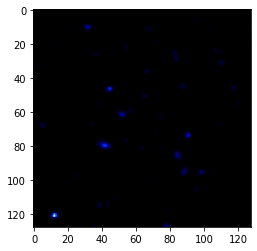

In [4]:
image = cv2.imread('../checkpoints/example.png')
plt.imshow(image)
image = np.array(image)
#wimage = tf.expand_dims(image,0)
img_tensor = np.expand_dims(image, axis=0)
img_tensor = (img_tensor/127.5)-1.0

## Upload Image

# Prediction

In [5]:
pred = yolo.predict(img_tensor)
boxes,scores,classes,nums = non_max_suppression(pred)
#boxes, scores,classes,nums = non_sim(pred)
print(boxes)
img_tensor = np.squeeze(img_tensor)
img = draw_outputs(img_tensor, boxes, scores, classes, nums)
plt.imshow(img)
plt.savefig("result")

ValueError: ignored